Importing Required Libraries

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Load/Read the data set

In [108]:
df = pd.read_csv("garments_worker_productivity.csv")
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


Correlation Analysis

In [109]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [110]:
#Computing correlation matrix
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)

                           team  targeted_productivity       smv       wip  \
team                   1.000000               0.030274 -0.110011 -0.033474   
targeted_productivity  0.030274               1.000000 -0.069489  0.062054   
smv                   -0.110011              -0.069489  1.000000 -0.037837   
wip                   -0.033474               0.062054 -0.037837  1.000000   
over_time             -0.096737              -0.088557  0.674887  0.022302   
incentive             -0.007674               0.032768  0.032629  0.167210   
idle_time              0.003796              -0.056181  0.056863 -0.026299   
idle_men               0.026974              -0.053818  0.105901 -0.048718   
no_of_style_change    -0.011194              -0.209294  0.315388 -0.072357   
no_of_workers         -0.075113              -0.084288  0.912176  0.030383   
actual_productivity   -0.148753               0.421594 -0.122089  0.131147   

                       over_time  incentive  idle_time  idle_me

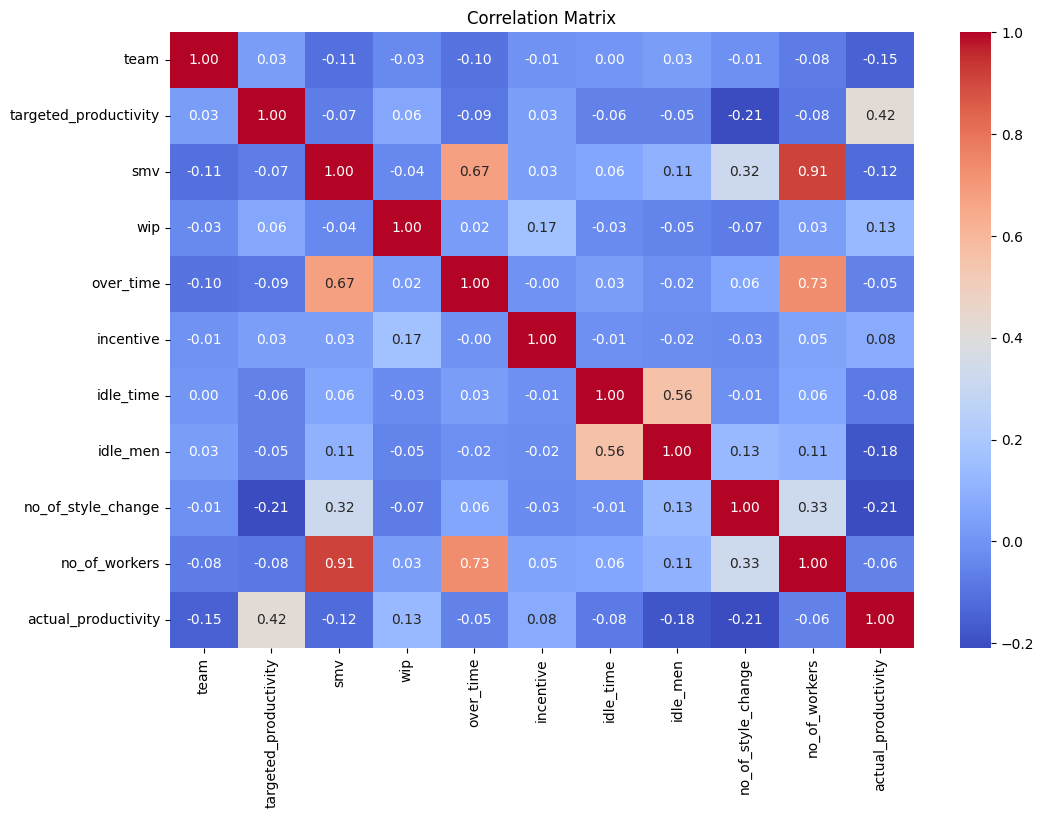

In [111]:
# Visualizing the Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Descriptive analysis

In [112]:
df.head()  # Display the first few rows of the dataset

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [113]:
df.tail()  # Display the last few rows of the dataset

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.9,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.9,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.9,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.9,NaN,1800,0,0.0,0,0,15.0,0.505889
1196,3/11/2015,Quarter2,finishing,Wednesday,6,0.70,2.9,NaN,720,0,0.0,0,0,6.0,0.394722


In [114]:
df.describe()  # Get a statistical summary of the dataset

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [115]:
df.shape # Number of rows and columns

(1197, 15)

In [116]:
df.columns  # List all columns in the dataset

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

In [117]:
df.info()  # Get a concise summary of the DataFrame, including data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [118]:
df.isna().sum()  # Check for missing values in each column

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [119]:
print(df.duplicated().sum())  # Check for duplicate rows in the dataset

0


In [120]:
print("Mean : " + str(df['actual_productivity'].mean()))
print("Median : " + str(df['actual_productivity'].median()))
print("Standard Deviation : " + str(df['actual_productivity'].std()))
print("Minimun : " + str(df['actual_productivity'].min()))
print("Maximum : " + str(df['actual_productivity'].max()))
df['actual_productivity'].describe()


Mean : 0.7350910969791145
Median : 0.773333333
Standard Deviation : 0.1744879035093953
Minimun : 0.233705476
Maximum : 1.1204375


count    1197.000000
mean        0.735091
std         0.174488
min         0.233705
25%         0.650307
50%         0.773333
75%         0.850253
max         1.120437
Name: actual_productivity, dtype: float64

In [121]:
df['department'].value_counts()  # Count the number of occurrences of each value in the 'department' column

department
sweing        691
finishing     257
finishing     249
Name: count, dtype: int64

In [122]:
df['team'].value_counts() # Count the number of occurrences of each value in the 'team' column

team
8     109
2     109
4     105
1     105
9     104
10    100
12     99
7      96
3      95
6      94
5      93
11     88
Name: count, dtype: int64

In [123]:
df.groupby('department')['actual_productivity'].mean() # Calculate the mean actual productivity for each department

department
finishing     0.722876
finishing     0.782089
sweing        0.722013
Name: actual_productivity, dtype: float64

In [124]:
df.groupby('team')['actual_productivity'].describe() # Get descriptive statistics for actual productivity grouped by team

,count,mean,std,min,25%,50%,75%,max
team,,,,,,,,
1,105.0,0.821054,0.153797,0.268214,0.778150,0.850427,0.910379,1.120437
2,109.0,0.770855,0.191442,0.247316,0.683551,0.800238,0.912037,1.108125
3,95.0,0.803880,0.141859,0.256500,0.750192,0.800511,0.901048,1.059621
4,105.0,0.770035,0.155715,0.287042,0.700134,0.800393,0.881575,1.096633
5,93.0,0.697981,0.169270,0.233705,0.600063,0.700618,0.800980,1.033570
6,94.0,0.685385,0.172876,0.263694,0.610786,0.750651,0.800258,0.977556
7,96.0,0.668006,0.179469,0.258000,0.572502,0.682975,0.800129,0.999533
8,109.0,0.674148,0.176414,0.251399,0.594872,0.700135,0.800129,1.011562
9,104.0,0.734462,0.164393,0.238042,0.681292,0.754346,0.850502,0.994271


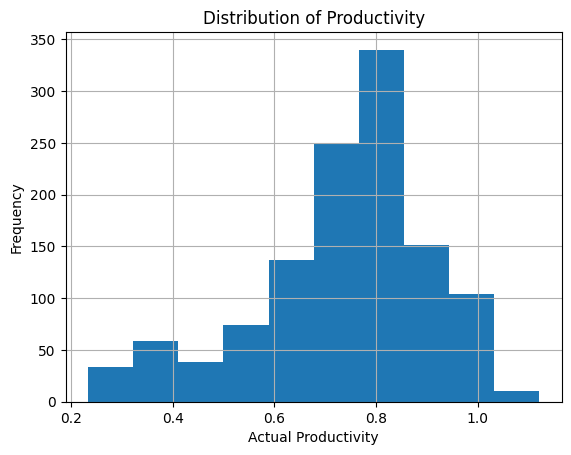

In [125]:
# Histogram
df['actual_productivity'].hist()
plt.title('Distribution of Productivity')
plt.xlabel('Actual Productivity')
plt.ylabel('Frequency')
plt.show()

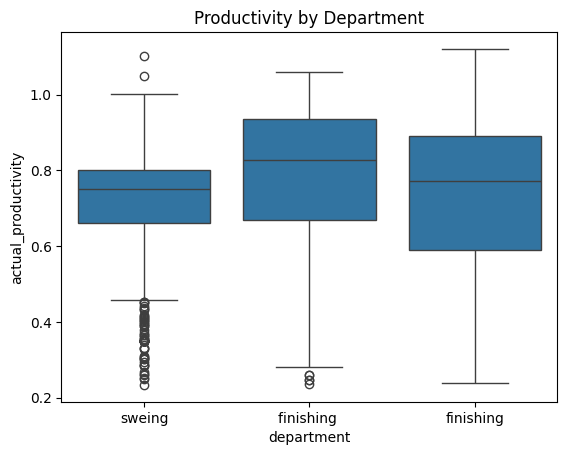

In [126]:
# Boxplot by department
sns.boxplot(x='department', y='actual_productivity', data=df)
plt.title('Productivity by Department')
plt.show()

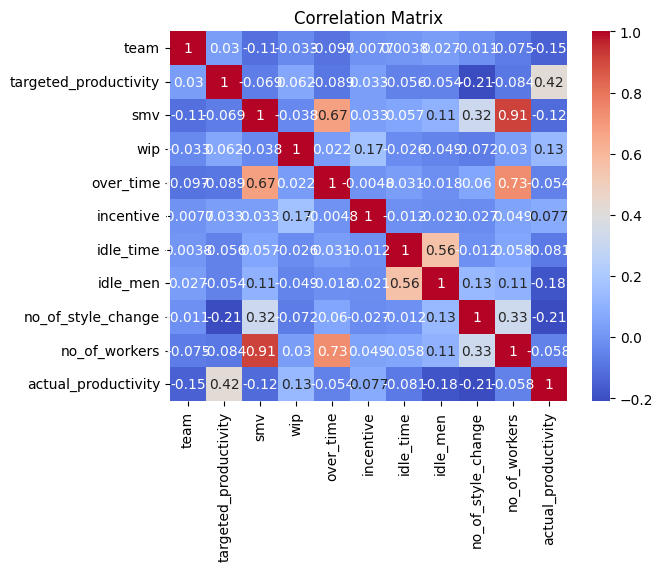

In [127]:
# Heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [128]:
print(df['actual_productivity'].skew())       # Skewness
print(df['actual_productivity'].kurtosis())   # Kurtosis

-0.8074917745097576
0.33322734124329134


Data Pre-Processing

Checking for null values

In [129]:
print("Dataset shape:", df.shape)

Dataset shape: (1197, 15)


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [131]:
#Finding frequency null values in the dataset
null_counts = df.isnull().sum()
print("\nNull values per column:\n", null_counts)


Null values per column:
 date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64


In [132]:
#In above code, we found that the wip column has 506 null value, so we will drop that row
df = df.drop(columns='wip')
df.shape

(1197, 14)

In [133]:
df.head()  # Displaying the first few rows of the cleaned dataset

,date,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382


Handling Date & department column

In [134]:
# Converting 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])
df.head(1)

,date,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,Quarter1,sweing,Thursday,8,0.8,26.16,7080,98,0.0,0,0,59.0,0.940725


In [135]:
#Extracting month from date and store in a new 'month' column also droping the original 'date' column
df['month'] = df['date'].dt.month
df = df.drop(columns=['date'])
df.head(1)


,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month
0,Quarter1,sweing,Thursday,8,0.8,26.16,7080,98,0.0,0,0,59.0,0.940725,1


Cleaning up department column

In [136]:
df['department'].unique() #Error in the data having some spaces in the department names

array(['sweing', 'finishing ', 'finishing'], dtype=object)

In [137]:
df['department'] = df['department'].astype(str).str.strip()
df['department'].unique()
# df.groupby("department")["actual_productivity"].mean()


array(['sweing', 'finishing'], dtype=object)

In [138]:
df[['month', 'department']].head()

,month,department
0,1,sweing
1,1,finishing
2,1,sweing
3,1,sweing
4,1,sweing


In [139]:
df.groupby("department")["targeted_productivity"].mean().sort_values(ascending=False)

department
finishing    0.737352
sweing       0.723980
Name: targeted_productivity, dtype: float64

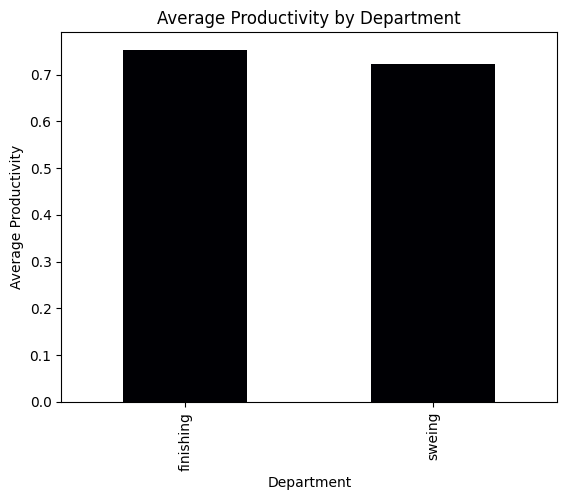

In [140]:
df.groupby("department")["actual_productivity"].mean().sort_values(ascending=False).plot(kind="bar" , colormap="magma")  # Calculate average productivity by department
plt.title("Average Productivity by Department")
plt.xlabel("Department")
plt.ylabel("Average Productivity")
plt.show()

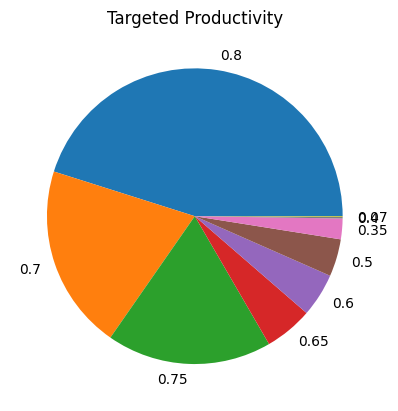

In [141]:
df['targeted_productivity'].value_counts().plot(kind='pie')
plt.title("Targeted Productivity")
plt.ylabel("") 
plt.show()

In [142]:
df["quarter"].value_counts()

quarter
Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: count, dtype: int64

Handling Categorical Values

In [143]:
class MultiColumnLabelEncoder:
    def __init__(self, columns=None):
        self.columns = columns  # list of column names to encode
        self.encoders = {}

    def fit(self, X, y=None):
        for col in self.columns:
            le = LabelEncoder()
            le.fit(X[col])
            self.encoders[col] = le
        return self

    def transform(self, X):
        output = X.copy()
        for col in self.columns:
            output[col] = self.encoders[col].transform(output[col])
        return output

    def fit_transform(self, X, y=None):
        return self.fit(X).transform(X)

    def inverse_transform(self, X):
        output = X.copy()
        for col in self.columns:
            output[col] = self.encoders[col].inverse_transform(output[col])
        return output

In [144]:
df.head()

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month
0,Quarter1,sweing,Thursday,8,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725,1
1,Quarter1,finishing,Thursday,1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500,1
2,Quarter1,sweing,Thursday,11,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,1
3,Quarter1,sweing,Thursday,12,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,1
4,Quarter1,sweing,Thursday,6,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382,1


In [145]:
categorical_cols = ['quarter', 'department', 'day']
encoder = MultiColumnLabelEncoder(columns=categorical_cols)
df = encoder.fit_transform(df)
df.head()


,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month
0,0,1,3,8,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725,1
1,0,0,3,1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500,1
2,0,1,3,11,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,1
3,0,1,3,12,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,1
4,0,1,3,6,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382,1


Splitting data into train and test

In [146]:
y = df['actual_productivity']  # Target variable
X = df.drop('actual_productivity', axis=1)  # Feature variables

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train, 20% test

Linear Regression Model

In [148]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
pred_test = model_lr.predict(X_test)

mae_lr = mean_absolute_error(y_test, pred_test)
mse_lr = mean_squared_error(y_test, pred_test)
r2_lr = r2_score(y_test, pred_test)

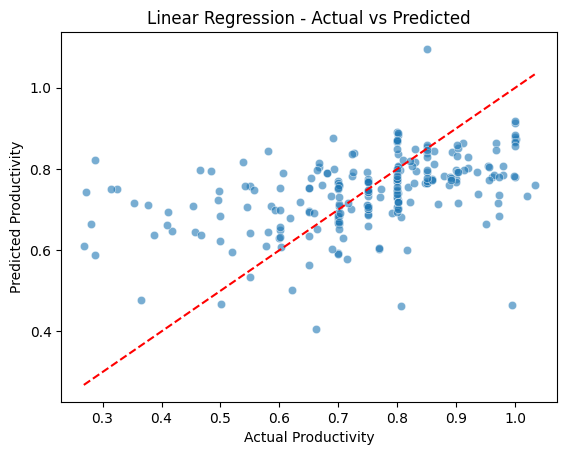

In [149]:
sns.scatterplot(x=y_test, y=pred_test, alpha=0.6)
plt.xlabel("Actual Productivity")
plt.ylabel("Predicted Productivity")
plt.title("Linear Regression - Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

Random Forest model

In [150]:
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)
pred = model_rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, pred)
mse_rf = mean_squared_error(y_test, pred)
r2_rf = r2_score(y_test, pred)

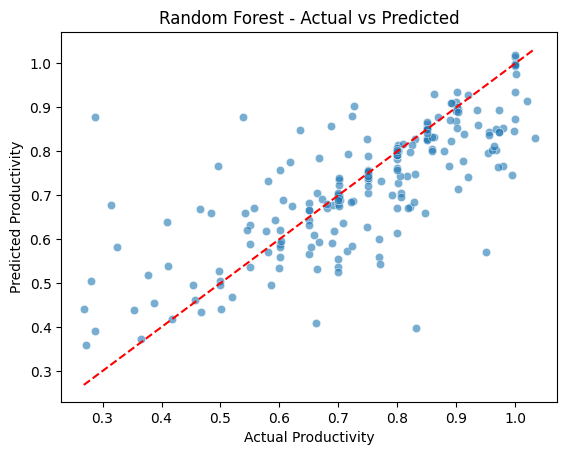

In [151]:
sns.scatterplot(x=y_test, y=pred, alpha=0.6)
plt.xlabel("Actual Productivity")
plt.ylabel("Predicted Productivity")
plt.title("Random Forest - Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

XGBoost Model

In [152]:
model_xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
model_xgb.fit(X_train, y_train)
pred3 = model_xgb.predict(X_test)

mae_xgb = mean_absolute_error(y_test, pred3)
mse_xgb = mean_squared_error(y_test, pred3)
r2_xgb = r2_score(y_test, pred3)

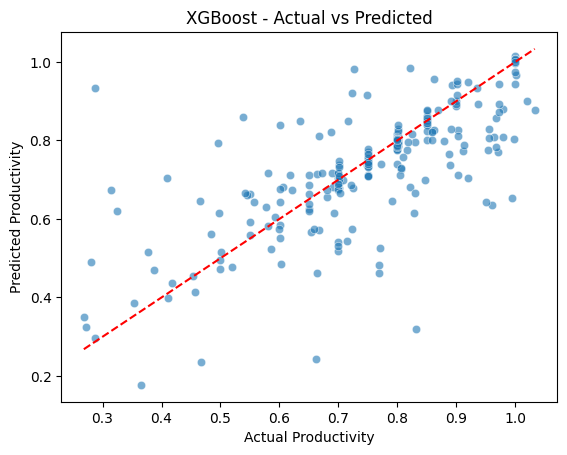

In [153]:
sns.scatterplot(x=y_test, y=pred3, alpha=0.6)
plt.xlabel("Actual Productivity")
plt.ylabel("Predicted Productivity")
plt.title("XGBoost - Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

Compare the model

In [154]:
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'MAE': [mae_lr, mae_rf, mae_xgb],
    'MSE': [mse_lr, mse_rf, mse_xgb],
    'R² Score': [r2_lr, r2_rf, r2_xgb]
}).sort_values(by='R² Score')

print(results_df)

               Model       MAE       MSE  R² Score
0  Linear Regression  0.107513  0.021423  0.193193
2            XGBoost  0.073991  0.014630  0.449034
1      Random Forest  0.067031  0.011831  0.554428


In [155]:
metrics_data = {
    'MAE': [mae_lr, mae_rf, mae_xgb],
    'MSE': [mse_lr, mse_rf, mse_xgb],
    'R² Score': [r2_lr, r2_rf, r2_xgb]
}
comparison_df = pd.DataFrame(metrics_data, index=['Linear Regression', 'Random Forest', 'XGBoost'])

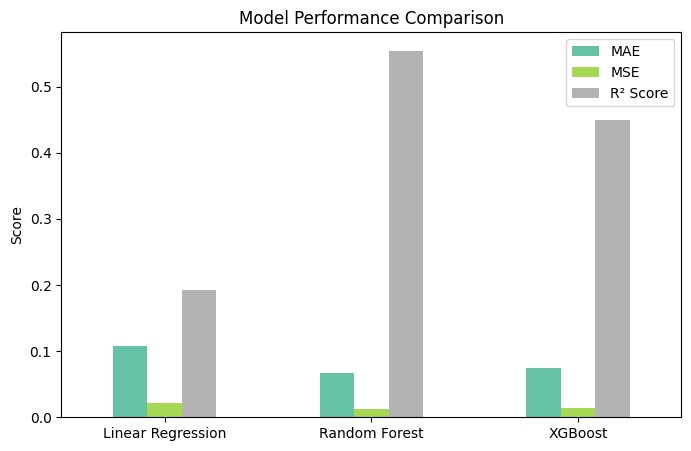

In [156]:
comparison_df.plot(kind='bar', figsize=(8, 5), colormap='Set2')
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()

Evaluating performance of the model and saving the model

In [158]:
with open('best_model.pkl', 'wb') as f:
    pickle.dump(model_xgb, f)

print("Model saved successfully as 'best_model.pkl'")

Model saved successfully as 'best_model.pkl'
